In [1]:
#Data is downloaded from following link
#https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

#Run following code if you want to run this code on google colab
#following code will upload files on google colab
#uploading files
from google.colab import files
files.upload()

Saving pima_indiana_diabetes.csv to pima_indiana_diabetes.csv


{'pima_indiana_diabetes.csv': b'6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31.0,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0.0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38.0,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30.0,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29.0,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43,1\r\n1,97,66,15,140,23.2,0.487,22,0\r\n13,145,82,19,110,22.2,0.245,57,0\r\n5

#### Bootstrap Confidence Intervals
Calculating confidence intervals with the bootstrap involves two steps:
1. Calculate a Population of Statistics
2. Calculate Confidence Intervals

In [0]:
import numpy
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [0]:
# load dataset
data = pd.read_csv('pima_indiana_diabetes.csv', header=None)
values = data.values

In [0]:
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)

#### Next, we will configure the bootstrap. We will use 1,000 bootstrap iterations and select a sample that is 50% the size of the dataset

In [0]:
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)

The sample will be selected with replacement using the resample() function from sklearn.
<br>Any rows that were not included in the sample are retrieved and used as the test dataset.
<br>Decision tree classifier is fit on the sample and evaluated on the test set, a classification score calculated, and added to a list of scores collected across all the bootstraps.
 

In [23]:
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
	test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
	# fit model
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
	# evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)
	print(score)
	stats.append(score)

0.6986899563318777
0.7014925373134329
0.6781115879828327
0.7073684210526315
0.6460554371002132
0.7468085106382979
0.7114967462039046
0.6588983050847458
0.6798245614035088
0.6872340425531915
0.6702586206896551
0.70995670995671
0.673773987206823
0.7006369426751592
0.6894273127753304
0.6544276457883369
0.6872340425531915
0.676595744680851
0.6593406593406593
0.6394849785407726
0.70995670995671
0.6652631578947369
0.6898047722342733
0.7073684210526315
0.6724137931034483
0.6666666666666666
0.6573275862068966
0.6821192052980133
0.7055084745762712
0.6801705756929638
0.6754966887417219
0.6956521739130435
0.6681034482758621
0.6803455723542117
0.7033898305084746
0.7118279569892473
0.6911764705882353
0.6809421841541756
0.6659574468085107
0.7177242888402626
0.714902807775378
0.6377440347071583
0.7327586206896551
0.683083511777302
0.6616379310344828
0.6572052401746725
0.6651785714285714
0.6885964912280702
0.70995670995671
0.721627408993576
0.6770186335403726
0.7094017094017094
0.67590618336887
0.6903

0.7243589743589743
0.6901709401709402
0.7043478260869566
0.7076923076923077
0.665938864628821
0.6558441558441559
0.7197452229299363
0.6956521739130435
0.7253218884120172
0.6896551724137931
0.7014925373134329
0.6767895878524945
0.678646934460888
0.6778242677824268
0.6868250539956804
0.703862660944206
0.6594360086767896
0.6573275862068966
0.6781857451403888
0.6834381551362684
0.6478260869565218
0.6915113871635611
0.6887417218543046
0.7133620689655172
0.7120879120879121
0.6666666666666666
0.7112068965517241
0.6868250539956804
0.7058823529411765
0.6877729257641921
0.6896551724137931
0.6723768736616702
0.6928104575163399
0.7247311827956989
0.6911447084233261
0.6900212314225053
0.7063829787234043
0.6888412017167382
0.6351931330472103
0.7355555555555555
0.7097457627118644
0.692144373673036
0.6445396145610278
0.6277533039647577
0.6864406779661016
0.7039473684210527
0.7130801687763713
0.7130434782608696
0.7076923076923077
0.6828752642706131
0.6717391304347826
0.7068607068607069
0.68921775898520

0.6973684210526315
0.6476793248945147
0.696969696969697
0.6766595289079229
0.6918103448275862
0.723175965665236
0.658695652173913
0.6594827586206896
0.6760259179265659
0.6767241379310345
0.6638477801268499
0.6575052854122622
0.6826086956521739
0.6957446808510638
0.6931330472103004
0.6617021276595745
0.6931330472103004
0.6574468085106383
0.6774891774891775
0.6926315789473684
0.6923076923076923
0.7106382978723405
0.643956043956044
0.683083511777302
0.6595744680851063
0.7142857142857143
0.691304347826087
0.6970338983050848
0.6638655462184874
0.7213822894168467
0.7088607594936709
0.7274678111587983
0.7152173913043478
0.6875
0.6958424507658644
0.7316017316017316
0.6616379310344828
0.7
0.6637931034482759
0.7158590308370044
0.6409185803757829
0.687089715536105
0.6744186046511628
0.7214912280701754
0.681917211328976
0.7221006564551422
0.7006507592190889
0.6775599128540305
0.6801705756929638
0.6800847457627118
0.7008547008547008
0.6949891067538126
0.701271186440678
0.6919739696312365
0.67590618

0.7158119658119658
0.7042553191489361
0.6673773987206824
0.6431623931623932
0.7006507592190889
0.6602150537634408
0.7078891257995735
0.6558441558441559
0.6869747899159664
0.6695652173913044
0.7053571428571429
0.7247311827956989
0.7072649572649573
0.67590618336887
0.6645569620253164
0.6774891774891775
0.7103004291845494
0.6911447084233261
0.7074235807860262
0.6731182795698925
0.6842105263157895
0.6419213973799127
0.6702355460385439
0.6824034334763949
0.6586433260393874
0.6631578947368421
0.7032258064516129
0.7127659574468085
0.709051724137931
0.680672268907563
0.7292576419213974
0.6892778993435449
0.6901709401709402
0.6916488222698073
0.6928104575163399
0.6904761904761905
0.7032258064516129
0.7225806451612903
0.7172995780590717
0.6638115631691649
0.7155361050328227
0.6709677419354839
0.7004310344827587
0.6743697478991597
0.6918238993710691
0.7124463519313304
0.6823027718550106
0.6659340659340659
0.7040169133192389
0.6995708154506438
0.7136752136752137
0.6540084388185654
0.69716775599128

0.6751592356687898
0.7316017316017316
0.6976241900647948
0.7056277056277056
0.6847826086956522
0.6997885835095138
0.7260579064587973
0.7361702127659574
0.6760259179265659
0.6939203354297694
0.6991525423728814
0.6481876332622601
0.6631130063965884
0.6860706860706861
0.6868250539956804
0.7239915074309978
0.6916488222698073
0.7232704402515723
0.6924731182795699
0.6666666666666666
0.6918103448275862
0.6824034334763949
0.6557734204793029
0.6782608695652174
0.6518046709129511
0.6949891067538126
0.6824034334763949
0.6539278131634819
0.6961206896551724
0.7032258064516129
0.6796536796536796
0.697228144989339
0.7051282051282052
0.6788008565310493
0.6805251641137856
0.6717391304347826
0.6978723404255319
0.717391304347826
0.6854663774403471
0.7062634989200864
0.7096069868995634
0.6738197424892703
0.7326086956521739
0.6961206896551724
0.697228144989339
0.6978260869565217
0.6731182795698925
0.6767895878524945
0.6834061135371179
0.6783369803063457
0.6709677419354839
0.6948051948051948
0.6507592190889

0.7066381156316917
0.6876310272536688
0.683083511777302
0.7057522123893806
0.6881720430107527
0.7050209205020921
0.665948275862069
0.6388888888888888
0.6884531590413944
0.6709401709401709
0.6596194503171248
0.693304535637149
0.7270742358078602
0.6845493562231759
0.6835164835164835
0.7154989384288747
0.6680672268907563
0.7002141327623126
0.7048832271762208
0.6782608695652174
0.6794871794871795
0.6894273127753304
0.6609808102345416
0.7337662337662337
0.5966029723991507
0.6927966101694916
0.691304347826087
0.7010752688172043
0.7379454926624738
0.6946902654867256
0.6788008565310493
0.6838709677419355
0.7068965517241379
0.7172995780590717
0.7060085836909872
0.6965811965811965
0.7393162393162394
0.6724890829694323
0.6441048034934498
0.6745689655172413
0.6586433260393874
0.6852248394004282
0.6956521739130435
0.6986899563318777
0.6637744034707158
0.700836820083682
0.7017543859649122
0.663135593220339
0.6708333333333333
0.7197452229299363
0.7182795698924731
0.7010752688172043
0.7192982456140351

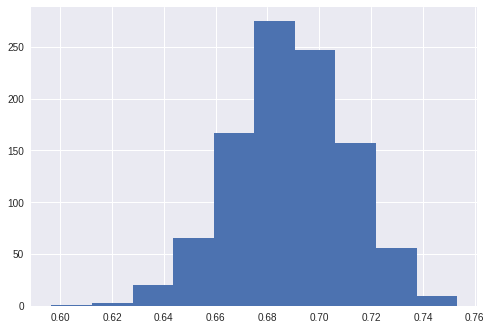

In [24]:
# plot scores
pyplot.hist(stats)
pyplot.show()


In [0]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100

In [26]:
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 64.4% and 73.0%
